<a href="https://colab.research.google.com/github/rikunemu/data_study/blob/main/mask_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/data分析/Face Mask Dataset/'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

In [ ]:
train_withmask_dir = os.path.join(train_dir, 'WithMask')
train_withoutmask_dir = os.path.join(train_dir, 'WithoutMask')
validation_withmask_dir = os.path.join(validation_dir, 'WithMask')
validation_withoutmask_dir = os.path.join(validation_dir, 'WithoutMask')
test_withmask_dir = os.path.join(test_dir, 'WithMask')
test_withoutmask_dir = os.path.join(test_dir, 'WithoutMask')

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 40,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 10040 images belonging to 2 classes.
Found 820 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (40, 150, 150, 3)
labels batch shape: (40,)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid')) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 39200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               2

In [ ]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.save('/content/drive/MyDrive/data分析/Face Mask Dataset/model.h5')

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=251,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=41)
#ETA は estimated time of arrivalの略で、1エポックあたりのトレーニングにかかる時間の予測のこと

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
251/251 [==============================] - 3347s 13s/step - loss: 0.1402 - accuracy: 0.9469 - val_loss: 0.0606 - val_accuracy: 0.9780
Epoch 2/10
251/251 [==============================] - 369s 1s/step - loss: 0.0473 - accuracy: 0.9816 - val_loss: 0.0281 - val_accuracy: 0.9878
Epoch 3/10
251/251 [==============================] - 372s 1s/step - loss: 0.0318 - accuracy: 0.9886 - val_loss: 0.0210 - val_accuracy: 0.9927
Epoch 4/10
251/251 [==============================] - 375s 1s/step - loss: 0.0225 - accuracy: 0.9920 - val_loss: 0.0149 - val_accuracy: 0.9951
Epoch 5/10
251/251 [==============================] - 381s 2s/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0306 - val_accuracy: 0.9902
Epoch 6/10
251/251 [==============================] - 398s 2s/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0162 - val_accuracy: 0.9939
Epoch 7/10
251/251 [==============================] - 399s 2s/step - loss: 0.0080 - accuracy: 0.9971 - val_loss: 0.0160 - val_accuracy: 0.99

In [ ]:
model.save('/content/drive/MyDrive/data分析/Face Mask Dataset/mask.h5')

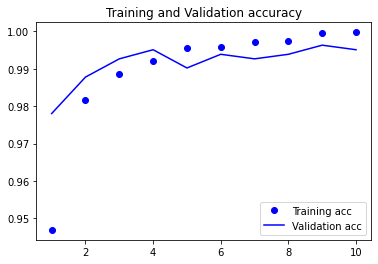

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.savefig('/content/drive/MyDrive/data分析/Face Mask Dataset/accuracy.png')
plt.show()
plt.close()

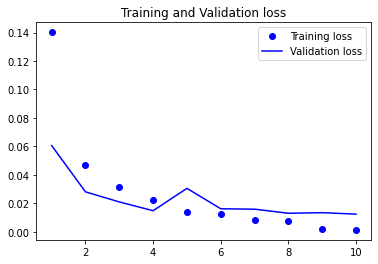

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/data分析/Face Mask Dataset/loss.png')
plt.show()
plt.close()

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.to_csv('/content/drive/MyDrive/data分析/Face Mask Dataset/history.csv')

In [ ]:
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.140204,0.946912,0.060608,0.978049
1,0.047282,0.981574,0.028107,0.987805
2,0.031756,0.988645,0.021034,0.992683
3,0.022534,0.992032,0.014871,0.995122
4,0.013770,0.995518,0.030573,0.990244
5,0.012391,0.995916,0.016231,0.993902
6,0.008047,0.997112,0.015950,0.992683
7,0.007732,0.997510,0.013074,0.993902
8,0.001972,0.999701,0.013495,0.996341
9,0.001382,0.999801,0.012480,0.995122


In [ ]:
# モデルと重みの読み込み
#model_from_json(open('model.json',"w").read(model.to_json()))
model.load_weights('/content/drive/MyDrive/data分析/Face Mask Dataset/mask.h5')

In [ ]:
test_generater = test_datagen.flow_from_directory(
    test_dir,
    target_size =  (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 992 images belonging to 2 classes.


In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generater, steps=31)
print('test acc:', test_acc)
print('test loss', test_loss)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.9858871102333069
test loss 0.05718327313661575
